<a href="https://colab.research.google.com/github/sangaer/PracticalMachineLearning2019/blob/master/%5BLecture1_1%5DLinearRegression_and_PracticalBasics_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1-1: Linear Regression

### Libraries

In [0]:
# machine learning library
import sklearn # https://scikit-learn.org/stable/

# linear algebra
import numpy as np # https://numpy.org/

# data processing
import pandas as pd # https://github.com/pandas-dev/pandas


# Task: predict "median_house_value" with the rest columns

In [0]:
train_file = 'sample_data/california_housing_train.csv'
test_file = 'sample_data/california_housing_test.csv'

pd.DataFrame

In [0]:
### impliment your code here: ###

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

### impliment your code here: ###

### Take a glace at the data.

In [4]:
df_train.shape

(17000, 9)

In [5]:
print('df_train is a {} with {} samples and {} features'.format(
    type(df_train), 
    df_train.shape[0], 
    df_train.shape[1]))

df_train is a <class 'pandas.core.frame.DataFrame'> with 17000 samples and 9 features


In [6]:
print('df_test is a {} with {} samples and {} features'.format(
    type(df_test), 
    df_test.shape[0], 
    df_test.shape[1]))

df_test is a <class 'pandas.core.frame.DataFrame'> with 3000 samples and 9 features


In [7]:
df_train.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [8]:
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
(df_train.describe() - df_test.describe()) / df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529
mean,-0.000227,-0.000285,-0.008954,0.016676,0.017538,0.018730,0.022565,0.019648,0.007017
std,0.005102,0.003589,0.002506,0.011172,0.013867,0.102199,0.049667,0.028113,0.024694
min,0.001367,-0.000615,0.000000,-2.000000,-1.000000,-0.666667,-1.000000,0.000000,-0.500100
25%,-0.000164,0.000000,0.000000,0.041724,0.020202,0.012658,0.031915,0.008719,-0.015075
50%,0.000042,-0.000584,0.000000,0.009873,-0.006912,0.010283,-0.001222,0.016208,0.015244
75%,-0.000169,0.000795,0.000000,0.007061,0.018897,-0.012638,0.013218,0.023185,0.003868
max,-0.001575,0.000715,0.000000,0.197354,0.159193,0.665518,0.189411,0.000000,0.000000


### Check feature/ label dfistributuin

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

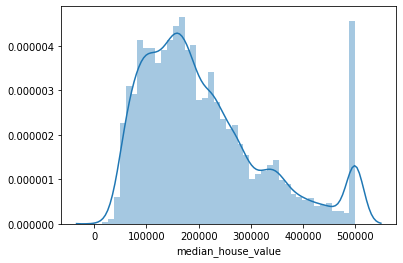

In [11]:
sns.distplot(df_train['median_house_value'])
plt.show()

## get X(feature), y(label)

In [12]:
print(df_train.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [0]:
### impliment your code here: ###

# take first 8 columns as features
x_train = df_train.iloc[:, :-1] 

# take "median_house_value" as label
y_train = df_train.iloc[:, -1] 

x_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

### impliment your code here: ###

# Linear Regression

![alt text](https://drive.google.com/uc?id=1wKQnzjZ1gHBcpMbv8HogGyE0EkjCvwFL)

reference: Jessee Kung 2019/4/10 (https://sites.google.com/view/tu-ad1062-mlfundamentals/)

## Gradient Descent Solver(Optimizer)


### loss function (which we want to minimize)

![alt text](https://drive.google.com/uc?id=1rhRQyxRwvSQ3pIc_oBwCcatBz-gO4uSY)

m: number of samples

### optimize

![alt text](https://drive.google.com/uc?id=1IwVWD8JeBvh34fNobAsShBtjSxc7cFVM)

### mathematical intuition

![alt text](https://drive.google.com/uc?id=1AOXqZfhCQqJnkEd5be8inqnY1dfWWKEQ)

# Simplified Gradient Descent Linear Regression Model as COde

In [0]:
import math # for checking "float('inf')" and float('nan')

class GDRegressor:

    def __init__(self, lr=0.1, it=10000):
        self.w = None
        self.b = None
        self.lr = lr
        self.iteration = it

    def fit(self, x, y):
        x = np.array(x)
        y = np.array(y)
        losses = list()
        
        m, n = x.shape
        self.w = np.zeros([n])
        self.b = 0

        for _ in range(self.iteration):
            _y = self.predict(x)
            
            loss = (1 / (2*m)) * np.sum(np.square(_y - y))
            assert not math.isnan(loss)
            assert not math.isinf(loss)
            losses.append(loss)

            dw = (1 / m) * np.dot(_y - y, x) # dw = d(loss)/dw
            db = (1 / m) * np.sum(_y - y) # db = d(loss)/db

            self.w -= self.lr * dw
            self.b -= self.lr * db
        # return losses

    def predict(self, x):
        assert self.w is not None
        assert self.b is not None
        return np.dot(self.w, x.T) + self.b


In [0]:
reg = GDRegressor()

In [16]:
reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


AssertionError: ignored

# OMG We got error! 
# Why?

## Normalization

![alt text](https://drive.google.com/uc?id=1RBHOQ1ZxVDqtElJR7tuB7AbLL0bmRJ8U)
reference: Jessee Kung 2019/4/3 (https://sites.google.com/view/tu-ad1062-mlfundamentals/)

In [0]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler() # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Fit and Normalize the trainingset

In [0]:
### impliment your code here: ###

normalizer.fit(x_train)
x_train_norm = normalizer.transform(x_train)

# x_train_norm = normalizer.fit_transform(x_train)
### impliment your code here: ###

Fit(train) the model

In [0]:
### impliment your code here: ###


reg.fit(x_train_norm, y_train)

### impliment your code here: ###

Inference(predict)

In [0]:
x_test_norm = normalizer.transform(x_test)
y_predict = reg.predict(x_test_norm)

In [21]:
y_predict.shape

(3000,)

# Common Regression Metrics

![alt text](https://drive.google.com/uc?id=1g-YNX3HW0_7qXMfX7squ93pGKLMZqErk)

# Q: would you take |MAPE| or |MAP| as your scoring function?

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

In [23]:
for metrix in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_percentage_error]:
    print('{}: {}'.format(metrix.__name__, metrix(y_test, y_predict)))

mean_absolute_error: 50352.22820302147
mean_squared_error: 4867205480.273812
mean_absolute_percentage_error: 29.7298740226202
mean_percentage_error: -10.419872284016803


# Other common algorithms

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

In [25]:
reg = SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
                   eta0=0.1, fit_intercept=True, l1_ratio=0.1,
                   learning_rate='invscaling', loss='squared_loss', max_iter=1000,
                   n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
                   shuffle=True, tol=0.01, validation_fraction=0.1, verbose=0,
                   warm_start=False)
reg.fit(normalizer.fit_transform(x_train), y_train)
y_predict = reg.predict(normalizer.transform(x_test))

print(reg)
for metrix in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_percentage_error]:
    print('{}: {}'.format(metrix.__name__, metrix(y_test, y_predict)))

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.1,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.01, validation_fraction=0.1, verbose=0,
             warm_start=False)
mean_absolute_error: 51893.10252530703
mean_squared_error: 4968857952.405462
mean_absolute_percentage_error: 31.253260766032774
mean_percentage_error: -11.213692001145144


In [26]:
reg = SGDRegressor()
reg.fit(normalizer.fit_transform(x_train), y_train)
y_predict = reg.predict(normalizer.transform(x_test))

print(reg)
for metrix in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_percentage_error]:
    print('{}: {}'.format(metrix.__name__, metrix(y_test, y_predict)))

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
mean_absolute_error: 50319.61730476265
mean_squared_error: 4869011852.004486
mean_absolute_percentage_error: 29.71867813334128
mean_percentage_error: -10.600551821298183


# Scoreing

In [27]:
### impliment your code here: ###

your_reg = 
your_reg.fit
y_predict = reg.predict

### impliment your code here: ###

SyntaxError: ignored

In [28]:
print(reg)
for metrix in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_percentage_error]:
    print('{}: {}'.format(metrix.__name__, metrix(y_test, y_predict)))

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
mean_absolute_error: 50319.61730476265
mean_squared_error: 4869011852.004486
mean_absolute_percentage_error: 29.71867813334128
mean_percentage_error: -10.600551821298183
